In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

   horsepower    price
0       111.0  13495.0
1       111.0  16500.0
2       154.0  16500.0
3       102.0  13950.0
4       115.0  17450.0
(200, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None
       horsepower         price
count  200.000000    200.000000
mean   103.320000  13230.375000
std     37.468615   7960.155239
min     48.000000   5118.000000
25%     70.000000   7775.000000
50%     95.000000  10320.000000
75%    116.000000  16500.750000
max    262.000000  45400.000000


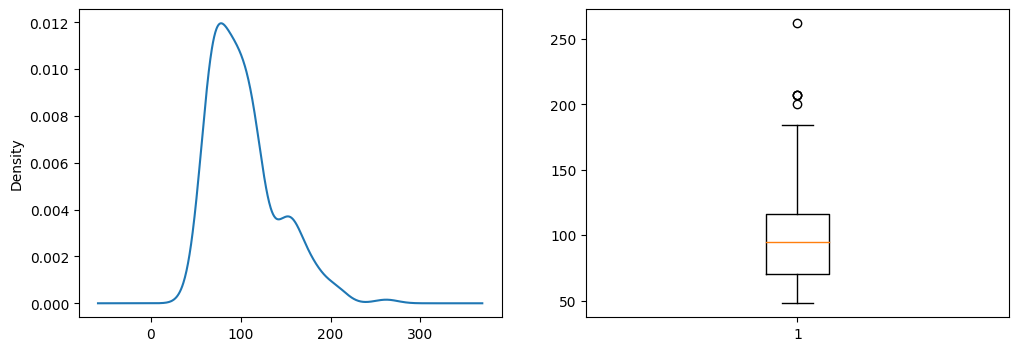

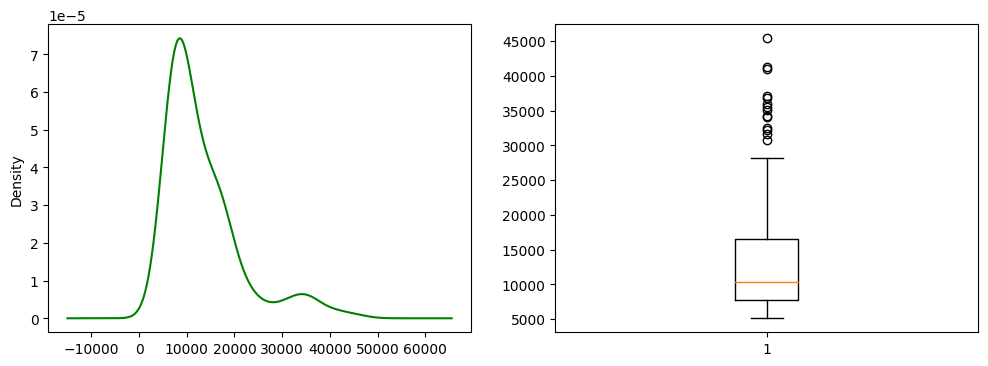

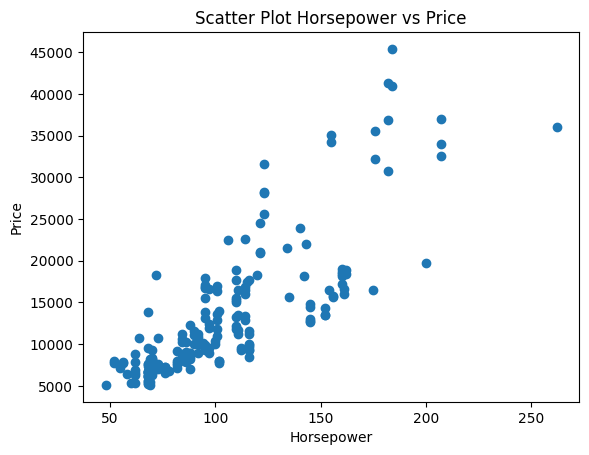

            horsepower     price
horsepower    1.000000  0.811097
price         0.811097  1.000000


In [48]:
"""IMPORT DATASET"""
df = pd.read_csv('dataframe/data_slr.csv', usecols=['horsepower', 'price'])

"""DATA INFORMATION"""
# Melihat 5 baris teratas dari data.
print(df.head())
# Mengetahui jumlah kolom dan baris dari data.
print(df.shape)
# Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
print(df.info())
# Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
print(df.describe())

"""HANDLING MISSING VALUE"""
df.isnull().sum()

"""EXPLORATORY DATA ANALYSIS (EDA)"""

# Univariate analysis dari horsepower.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

# Univariate analysis dari price.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

# Bivariate analysis horsepower dan price.
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

# Mengetahui nilai korelasi dari horsepower dan price.
print(df.corr())

LinearRegression Model: y =  [[192.11535142]] x -  [-6139.11545664]
[[13072.41968552]]


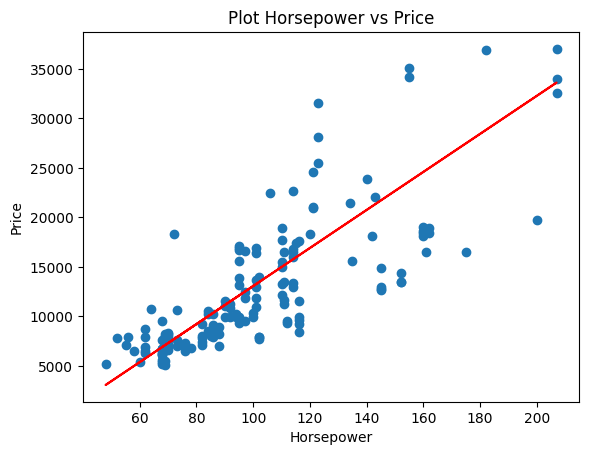

In [53]:
"""MODEL DEVELOPMENT"""
# Find x and y variables
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

# Split the data to obtain training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.2)

# Simple linear regression model
lin_reg = LinearRegression()

# Train your model
lin_reg.fit(x_train, y_train)

# Finding slope and intercept
slope = lin_reg.coef_
intercept = lin_reg.intercept_

# Your model:
print('LinearRegression Model: y = ',slope,'x - ',intercept)

# Accuracy score
lin_reg.score(x_test, y_test)

# Prediction
y_pred = lin_reg.predict(x_test)
x_ = [[100]]
y_pred2 = intercept + slope*x_
print(y_pred2)

# Visualization
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')
plt.show()

In [54]:
"""MODEL EVALUATION"""
zipped = list(zip(y_test, y_pred))
df_slr = pd.DataFrame(zipped, columns=['ActualValue', 'PredictedValue'])
df_slr.head()

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MAE)
r2 = lin_reg.score(x, y)*100

print('R squared: {:.2f}'.format(r2))
print('Mean Absolute Error: ', MAE)
print('Mean Square Error: ', MSE)
print('Root Mean Square Error: ', RMSE)

R squared: 64.55
Mean Absolute Error:  3101.280573520721
Mean Square Error:  18799570.79980755
Root Mean Square Error:  55.689142330626005


In [46]:
# https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c
# https://medium.com/@adiptamartulandi/belajar-machine-learning-simple-linear-regression-di-python-e82972695eaf